Camilo Ruiz Bermudez, Natalia Lopez Gallego, Juan Pablo Gomez Veira y Sebastian Belalcazar Mosquera

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chardet
import json
import pytz
import requests
import plotly.express as px
from dash import Dash, Input, Output
import dash_core_components as dcc
import dash_html_components as html
import tkinter as tk
from tkinter import ttk
from tkinter import font

# URL del archivo CSV
"""url = 'https://drive.google.com/uc?id=1Uiqy2oX-abvxwHw8j-NtT3C9K47AESIO' #url 10 tickets
url = "https://drive.google.com/file/d/1npkbJ2I0a2AhwBREITjugCLLKZQ_1qVo/view?usp=drive_link" #csv completo
url = "/content/salida-csv.csv"""

#Read file from GitHub
url = 'https://raw.githubusercontent.com/SEBASBELMOS/KPI-Tech/main/salida.json'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
data = response.content.decode(encoding)

tickets = [json.loads(line) for line in data.splitlines()]

df = pd.json_normalize(tickets)

df.head(2)

C:\Users\sebas\AppData\Local\Temp\ipykernel_15696\2205235965.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\sebas\AppData\Local\Temp\ipykernel_15696\2205235965.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


,_id,departamento,detalle,estado,fecha_creacion,prioridad,tipo_soporte,titulo,cliente._id,cliente.numero_identificacion,...,solucion.fecha_inicio,solucion.fecha_fin,solucion.medio._id,solucion.medio.valor,solucion.detalle,responsable,responsable.proceso,contacto,creador.cargo,solucion.medio
0,581dea48215bcd4975436f30,Implementación y Soporte,se queda bloqueado y cuando funciona es muy lento,Cerrado,2023-08-22 00:00:00,False,Soporte Software,No puede trabajar en el programa,57e9457ec082559e4165b6b2,900161921.0,...,2016-11-05 09:16:33,2016-11-05 09:17:23,57cde43e818c89787fa4e95b,Internet-Remoto,se indexan los archivos y se soluciona el prob...,NaN,NaN,NaN,NaN,NaN
1,581df212215bcd4975436f31,Implementación y Soporte,En contabilidad ya existe,Cerrado,2023-08-22 00:00:00,False,Soporte Software,No puede adicionar una NC,57e3e8bd50b9e8b03adb4dda,900243602.0,...,2016-11-05 09:49:46,2016-11-05 09:53:38,57cde43e818c89787fa4e95b,Internet-Remoto,se le indica que las notas credito por anulaci...,NaN,NaN,NaN,NaN,NaN


In [2]:
f_df = df.drop(['_id','cliente._id','creador.cargo.__v','creador.cargo.consecutivo', "creador.cargo._id", "solucion.medio._id","responsable.numero_identificacion"], axis=1)

#Prop #2
#f_df = df.drop(['_id', 'departamento', 'fecha_creacion', 'prioridad', 'cliente._id', 'cliente.numero_identificacion', 'contacto.cargo', 'contacto.nombre', 'creador.cargo.__v', 'creador.cargo.consecutivo', 'creador.cargo.valor', 'creador.cargo.categoria', 'creador.cargo._id', 'creador.nombre', 'responsable._id', 'responsable.proceso._id', 'responsable.proceso.valor', 'responsable.tipo', 'responsable', 'responsable.proceso', 'creador.cargo', 'solucion.medio', 'solucion.medio._id', 'contacto', "tipo_soporte", "responsable.numero_identificacion","responsable.cargo"], axis=1)

f_df.head(2)

,departamento,detalle,estado,fecha_creacion,prioridad,tipo_soporte,titulo,cliente.numero_identificacion,cliente.nombre,contacto.cargo,...,responsable.tipo,solucion.fecha_inicio,solucion.fecha_fin,solucion.medio.valor,solucion.detalle,responsable,responsable.proceso,contacto,creador.cargo,solucion.medio
0,Implementación y Soporte,se queda bloqueado y cuando funciona es muy lento,Cerrado,2023-08-22 00:00:00,False,Soporte Software,No puede trabajar en el programa,900161921.0,YAMOTOS QUILICHAO SA - YAMOTOS - CALLE 70,Asesor Comercial,...,Empleado,2016-11-05 09:16:33,2016-11-05 09:17:23,Internet-Remoto,se indexan los archivos y se soluciona el prob...,NaN,NaN,NaN,NaN,NaN
1,Implementación y Soporte,En contabilidad ya existe,Cerrado,2023-08-22 00:00:00,False,Soporte Software,No puede adicionar una NC,900243602.0,O´GRAFICAS IMPRESORES S.A.S,Secretaria auxiliar Contable,...,Empleado,2016-11-05 09:49:46,2016-11-05 09:53:38,Internet-Remoto,se le indica que las notas credito por anulaci...,NaN,NaN,NaN,NaN,NaN


In [3]:
#not necessary
"""df.loc[:, ['creador/cargo/consecutivo']] == 1
df[df['creador/cargo/consecutivo'].isnull()]
df.head(2)"""

"df.loc[:, ['creador/cargo/consecutivo']] == 1\ndf[df['creador/cargo/consecutivo'].isnull()]\ndf.head(2)"

In [5]:
# Using CSV
"""

f_df["fecha_server.$date"] = pd.to_datetime(f_df["fecha_server.$date"], format="%Y-%m-%d %H:%M:%S")
f_df["fecha_creacion"] = pd.to_datetime(f_df["fecha_creacion"], format="%Y-%m-%d %H:%M:%S")
f_df["solucion.fecha_inicio"] = pd.to_datetime(f_df["solucion.fecha_inicio"], format="%Y-%m-%d %H:%M:%S")
f_df["solucion.fecha_fin"] = pd.to_datetime(f_df["solucion.fecha_fin"], format="%Y-%m-%d %H:%M:%S")

columnas_fecha = ["fecha_server.$date", "fecha_creacion", "solucion.fecha_inicio","solucion.fecha_fin"]

for columna in columnas_fecha:
    try:
        f_df[columna] = pd.to_datetime(f_df[columna], format="%Y-%m-%d %H:%M:%S")
    except ValueError:
        print(f"Error al convertir la columna '{columna}' a datetime. Revisar formato de fechas.")


f_df["TPPR"] = (f_df["fecha_creacion"] - f_df["fecha_server.$date"]).dt.total_seconds() / 60

f_df["TPPR"] = (f_df["fecha_creacion"] - f_df["fecha_server.$date"]).dt.total_seconds() / 60
# Calcular el tiempo de resolución (TPR) en
f_df["TPR"] = (f_df["solucion.fecha_fin"] - f_df["fecha_creacion"]).dt.total_seconds() / 60

# Calcular el tiempo de primera respuesta (TPPR) en
f_df["TPPR"] = (f_df["fecha_creacion"] - f_df["fecha_server.$date"]).dt.total_seconds() / 60

# Calcular el TPR promedio en  utilizando numpy
tpr_promedio = np.mean(f_df["TPR"])

tppr_promedio = np.mean(f_df["TPPR"])

print("Tiempo Promedio de Resolución (TPR):", tpr_promedio, "minutos")
print("Tiempo Promedio de Primera Respuesta (TPPR):", tppr_promedio, "minutos")"""

'\n\nf_df["fecha_server.$date"] = pd.to_datetime(f_df["fecha_server.$date"], format="%Y-%m-%d %H:%M:%S")\nf_df["fecha_creacion"] = pd.to_datetime(f_df["fecha_creacion"], format="%Y-%m-%d %H:%M:%S")\nf_df["solucion.fecha_inicio"] = pd.to_datetime(f_df["solucion.fecha_inicio"], format="%Y-%m-%d %H:%M:%S")\nf_df["solucion.fecha_fin"] = pd.to_datetime(f_df["solucion.fecha_fin"], format="%Y-%m-%d %H:%M:%S")\n\ncolumnas_fecha = ["fecha_server.$date", "fecha_creacion", "solucion.fecha_inicio","solucion.fecha_fin"]\n\nfor columna in columnas_fecha:\n    try:\n        f_df[columna] = pd.to_datetime(f_df[columna], format="%Y-%m-%d %H:%M:%S")\n    except ValueError:\n        print(f"Error al convertir la columna \'{columna}\' a datetime. Revisar formato de fechas.")\n\n\nf_df["TPPR"] = (f_df["fecha_creacion"] - f_df["fecha_server.$date"]).dt.total_seconds() / 60\n\nf_df["TPPR"] = (f_df["fecha_creacion"] - f_df["fecha_server.$date"]).dt.total_seconds() / 60\n# Calcular el tiempo de resolución (TPR

In [3]:
new_df = f_df[['fecha_server.$date', 'solucion.fecha_inicio', 'solucion.fecha_fin']].copy()

new_df['fecha_server.$date'] = pd.to_datetime(new_df['fecha_server.$date'])

colombia_tz = pytz.timezone('America/Bogota')

new_df['fecha_server.$date'] = new_df['fecha_server.$date'].dt.tz_convert(colombia_tz)

new_df['fecha_server.$date'] = pd.to_datetime(new_df['fecha_server.$date'], format='%Y-%m-%d %H:%M:%S')

colombia_tz = pytz.timezone('America/Bogota')

new_df['fecha_server.$date'] = new_df['fecha_server.$date'].dt.tz_convert(colombia_tz).dt.strftime('%Y-%m-%d %H:%M:%S')

In [4]:
d_df = new_df.copy()

d_df = d_df.astype(str)

In [5]:
d_df['fecha_server.$date'] = pd.to_datetime(d_df['fecha_server.$date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
d_df['solucion.fecha_inicio'] = pd.to_datetime(d_df['solucion.fecha_inicio'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
d_df['solucion.fecha_fin'] = pd.to_datetime(d_df['solucion.fecha_fin'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

d_df = d_df.dropna()

d_df["TPR"] = (d_df["solucion.fecha_fin"] - d_df["solucion.fecha_inicio"])
d_df["TPPR"] = (d_df["solucion.fecha_inicio"] - d_df['fecha_server.$date'])


tpr_promedio_minutos = np.mean(d_df["TPR"].dt.total_seconds() / 60)
tppr_promedio_minutos = np.mean(d_df["TPPR"].dt.total_seconds() / 60)

tpr_promedio_str = pd.to_timedelta(tpr_promedio_minutos, unit='m')
tppr_promedio_str = pd.to_timedelta(tppr_promedio_minutos, unit='m')

print("Tiempo Promedio de Resolución (TPR):", tpr_promedio_str)
print("Tiempo Promedio de Primera Respuesta (TPPR):", tppr_promedio_str)

Tiempo Promedio de Resolución (TPR): 0 days 02:09:28.957491576
Tiempo Promedio de Primera Respuesta (TPPR): 0 days 13:57:57.297773676


##Charts


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

Text(0, 0.5, 'Frecuencia')

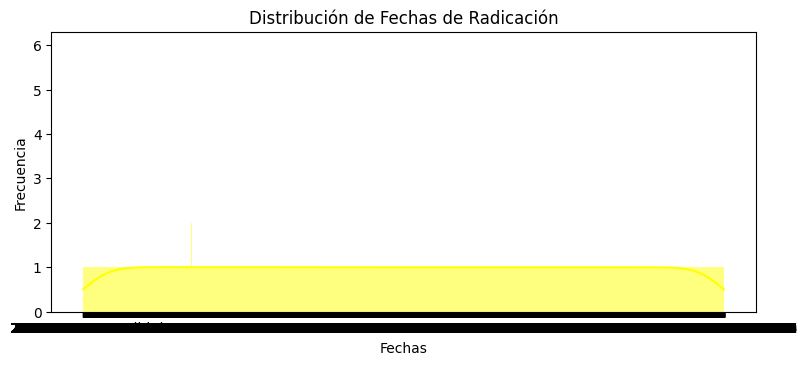

In [7]:
#Chart - Fecha inicio
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
sns.histplot(d_df['solucion.fecha_inicio'], kde=True, bins=30, color='yellow')
plt.title('Distribución de Fechas de Radicación')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

Text(0, 0.5, 'Frecuencia')

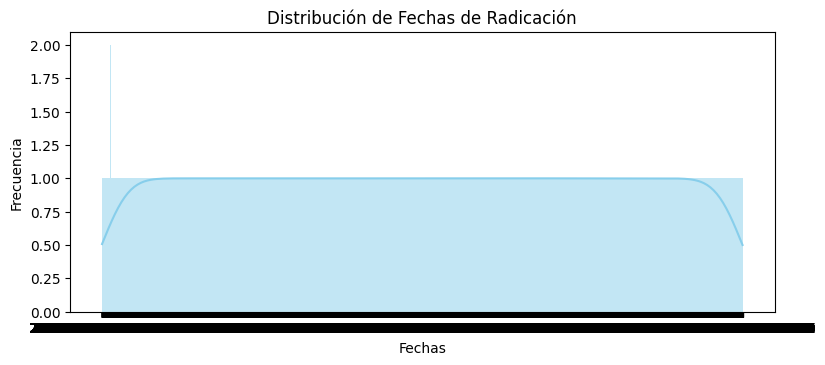

In [8]:
#Chart - Fecha fin
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
sns.histplot(d_df['solucion.fecha_fin'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Fechas de Radicación')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

Text(0, 0.5, 'Frecuencia')

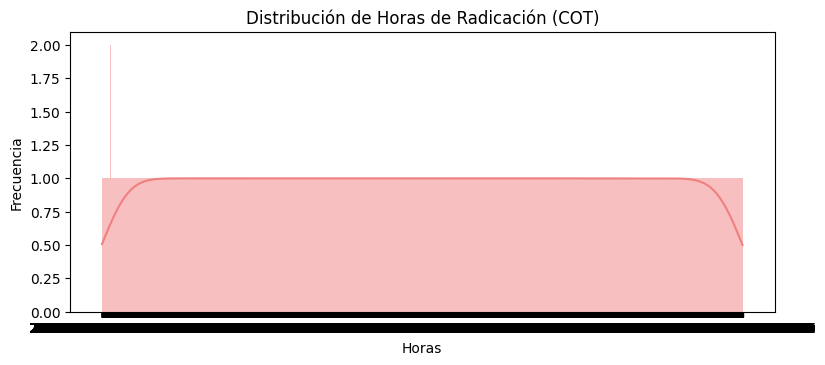

In [9]:
#Not mandatory
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 2)
sns.histplot(d_df['solucion.fecha_fin'], kde=True, bins=20, color='lightcoral')
plt.title('Distribución de Horas de Radicación (COT)')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

KeyError: 'nombre'

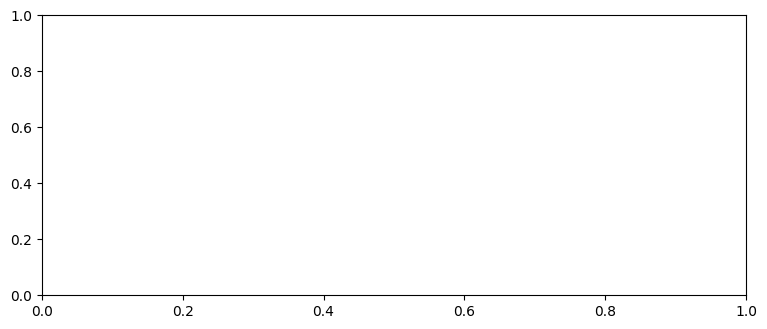

In [7]:
d_df['nombre'] = d_df['cliente'].apply(lambda x: x['nombre'])

plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 3)
sns.histplot(d_df['nombre'], kde=True, bins=30, color='lightgreen')
plt.title('Distribución de Fechas de Inicio de Soporte')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

name_counts = d_df['nombre'].value_counts()

name_counts.plot(kind='bar', figsize=(20, 8))
plt.title('Frequency of Names')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.show()

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frecuencia')

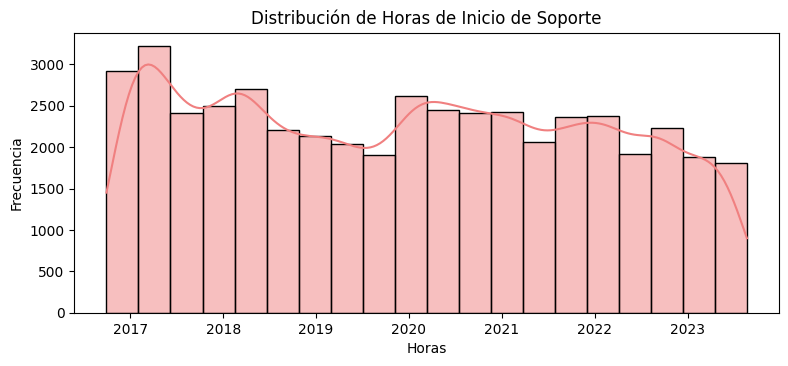

In [10]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 4)
sns.histplot(d_df['fecha_server.$date'], kde=True, bins=20, color='lightcoral')
plt.title('Distribución de Horas de Inicio de Soporte')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

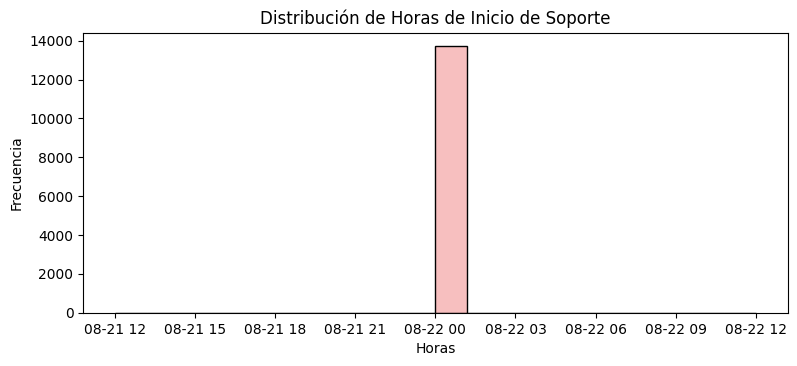

In [ ]:
#v1



plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 4)
sns.histplot(df['fecha_server/$date'], kde=True, bins=20, color='lightcoral')
plt.title('Distribución de Horas de Inicio de Soporte')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

##Empresas que registran tickets - Sebastián

In [ ]:


# Supongamos que ya has realizado la conversión de las columnas de hora en df

# Crear un gráfico de dispersión de Hora radicacion (COT) vs Hora de inicio de soporte
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Formato de las etiquetas de los ejes x e y para mostrar solo las horas y minutos
df["Hora radicacion (COT)"] = df["Hora radicacion (COT)"].dt.strftime("%H:%M")
df["Hora de inicio de soporte"] = df["Hora de inicio de soporte"].dt.strftime("%H:%M")

plt.scatter(df["Hora radicacion (COT)"], df["Hora de inicio de soporte"], alpha=0.5)  # Crear el gráfico de dispersión
plt.title("Hora de Radicación vs Hora de Inicio de Soporte")  # Título del gráfico
plt.xlabel("Hora de Radicación (COT)")  # Etiqueta del eje x
plt.ylabel("Hora de Inicio de Soporte")  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()  # Mostrar el gráfico


AttributeError: ignored

<Figure size 1000x600 with 0 Axes>

##TPR TPPR

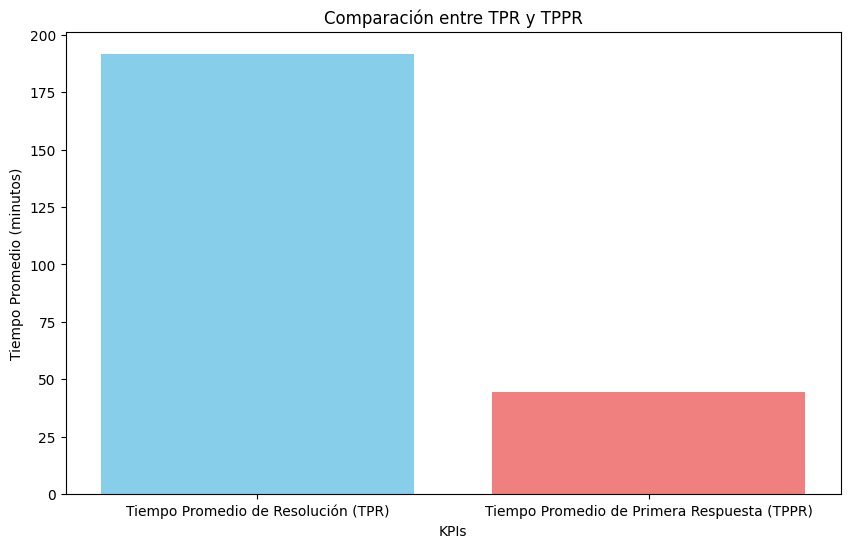

In [ ]:
df['tiempo_resolucion'] = (df['Fecha de fin de soporte'] - df['Fecha de radicacion']).dt.total_seconds() / 60

df['tiempo_primera_respuesta'] = (df['Fecha de inicio de soporte'] - df['Fecha de radicacion']).dt.total_seconds() / 60


TAR = df['tiempo_resolucion'].mean()
TAPR = df['tiempo_primera_respuesta'].mean()

kpi_names = ['Tiempo Promedio de Resolución (TPR)', 'Tiempo Promedio de Primera Respuesta (TPPR)']

kpi_values = [TAR, TAPR]


colors = ['skyblue', 'lightcoral']


plt.figure(figsize=(10, 6))
plt.bar(kpi_names, kpi_values, color=colors)

plt.xlabel('KPIs')
plt.ylabel('Tiempo Promedio (minutos)')
plt.title('Comparación entre TPR y TPPR')

plt.show()

In [1]:
#WE WILL USE AND NEED THIS WHEN WE IMPLEMENT DASH
app = Dash(__name__)
app.title = "Análisis Logístico"

app.layout = html.Div([
    html.H1("Análisis de Órdenes Logísticas", style={'text-align': 'center'}),
    html.Img(src='/assets/logo.png'),  # replace 'logo.png' with your logo file name

    dcc.Dropdown(id="slct_order_type",
                 options=[{"label": order_type, "value": order_type} for order_type in order_types],
                 multi=False,
    # rest of your layout...
])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 5 (262246269.py, line 9)